Name: Anuja Pachwadkar

Roll No: BBCO21159

Assignment 3


Convolutional neural network (CNN) (Any One from the following)
• Use any dataset of plant disease and design a plant disease detection system using CNN.
• Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into categories.


In [ ]:
from __future__ import absolute_import, division, print_function

# TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Load the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [ ]:
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]


In [ ]:
# Check the shape of training data
print("Training images shape:", train_images.shape)
print("Number of training labels:", len(train_labels))

# Check the shape of testing data
print("Testing images shape:", test_images.shape)
print("Number of testing labels:", len(test_labels))


Training images shape: (60000, 28, 28)
Number of training labels: 60000
Testing images shape: (10000, 28, 28)
Number of testing labels: 10000


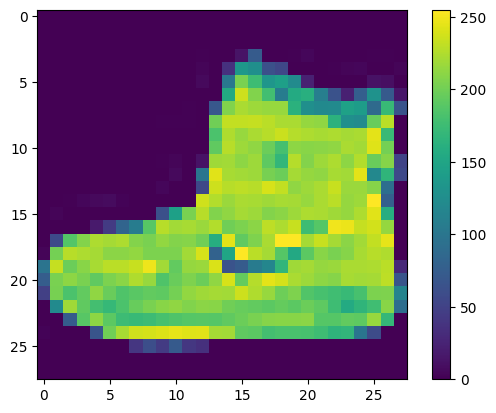

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0


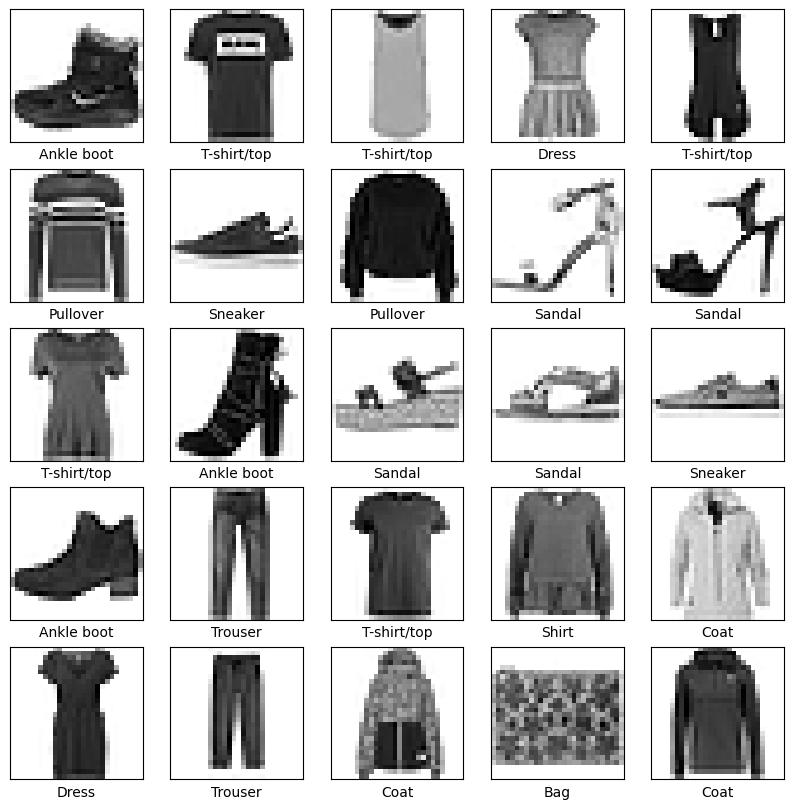

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Input Layer
    keras.layers.Dense(128, activation='relu'),  # Hidden Layer
    keras.layers.Dense(10, activation='softmax') # Output Layer
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7844 - loss: 0.6253
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8641 - loss: 0.3816
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8778 - loss: 0.3329
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8859 - loss: 0.3136
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8929 - loss: 0.2901


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8687 - loss: 0.3655
Test accuracy: 0.8687999844551086


In [ ]:
predictions = model.predict(test_images)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
print("Predicted label:", np.argmax(predictions[0]))
print("Actual label:", test_labels[0])


Predicted label: 9
Actual label: 9


In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(
        class_names[predicted_label],
        100*np.max(predictions_array),
        class_names[true_label]
    ), color=color)


In [ ]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    bars = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])

    predicted_label = np.argmax(predictions_array)
    bars[predicted_label].set_color('red')
    bars[true_label].set_color('blue')


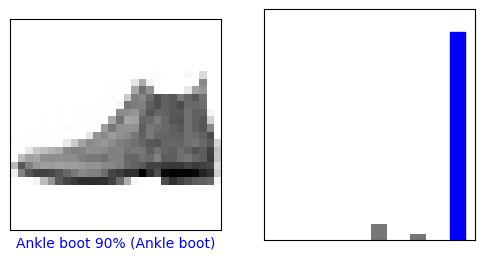

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()


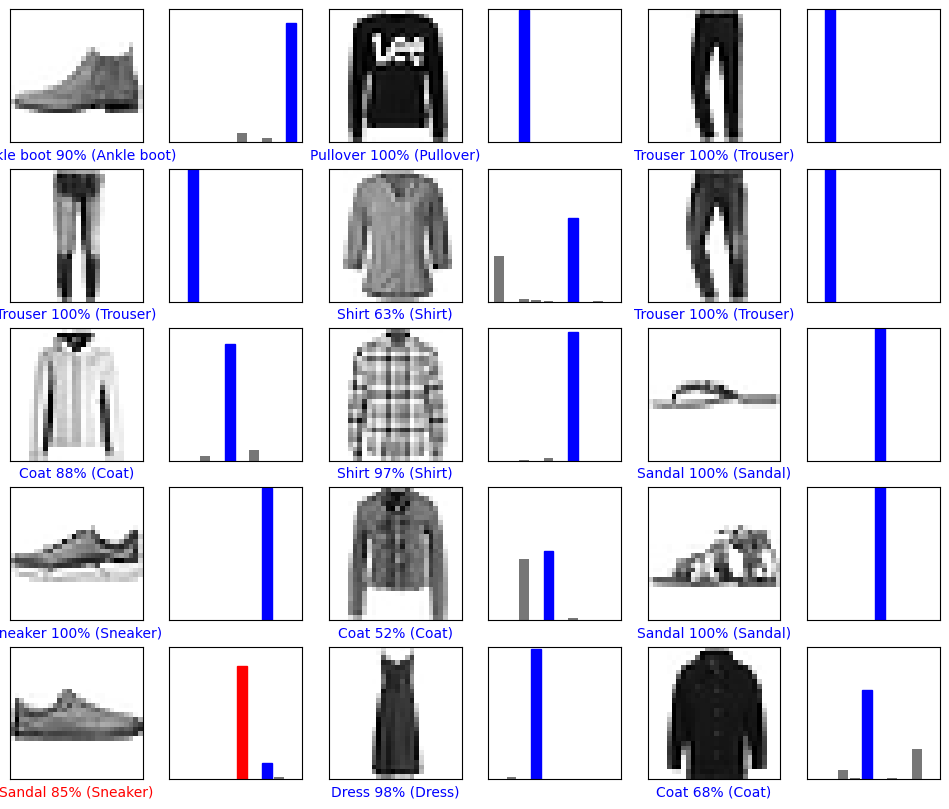

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()


In [ ]:
img = test_images[0]
print("Image shape before expansion:", img.shape)

# Expand dimensions to match the input shape of the model
img = np.expand_dims(img, 0)
print("Image shape after expansion:", img.shape)

predictions_single = model.predict(img)
print("Predicted probabilities:", predictions_single)


Image shape before expansion: (28, 28)
Image shape after expansion: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted probabilities: [[7.4434761e-06 2.1083974e-08 2.3044986e-06 1.0756288e-07 3.3294253e-07
  7.0338212e-02 5.3808327e-07 2.8603142e-02 4.4201979e-06 9.0104353e-01]]


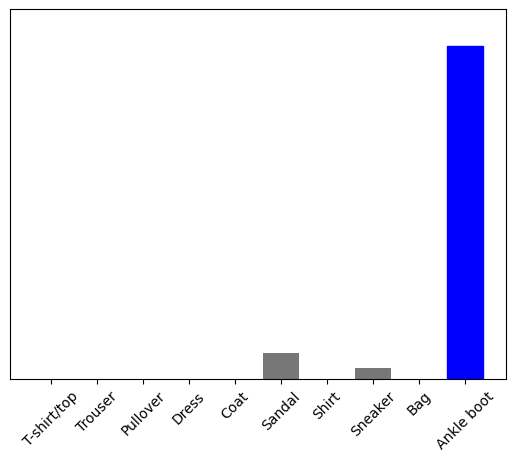

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


In [ ]:
np.argmax(predictions_single[0])


np.int64(9)